<a href="https://colab.research.google.com/github/nclnngzmn/CpE-AIML/blob/main/58034_Lab03_Tyche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 1: Simple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Create a class named `LinearRegression_Simple()` wherein it can compute for the linear regression for a single variable. The class will be required to have the following helper methods:
> 1. `covariance(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the covariance between the two input vectors (scalar) 
> 2. `pearsons_R(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the correlation between the two input vectors (scalar)
> 3. `train(X, y)`
>> input: 2 single-dimension vectors
>>
>> output: the weights of the linear regressor.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should accept both scalar and vector values.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication.
> 5. `evaluate()`
>> input: 
>>
>> output: a `dictionary` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared of the model. Note: You should use the `predict()` method here.
> 5. `visualize()`
>> input: *none*
>>
>> output: a visualization of the linear regressor over the input dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
## No other packages or libraries can be added in this cell

In [2]:
### YOUR CODE HERE
class LinearRegression_Simple():

  def covariance(self, vectA, vectB):    
    cov = (np.cov(vectA, vectB, bias=False)[0][1]).round(2)
    return print(f'cov(xy) = {cov}')

  def pearsons_r(self, vectA, vectB):  
    self.pearsons_r = np.corrcoef(vectA, vectB)[0,1]  
    return print(f'r = {self.pearsons_r}')

  def train(self, X, y):
    std_X, std_y = np.std(X), np.std(y)      
    self.w1 = (self.pearsons_r*(std_y/std_X))
    self.w0 = y.mean()-self.w1*X.mean()    
    self.model_ = (np.array([self.w1.round(2),self.w0.round(2)])).reshape(2,1)
    return

  def predict(self, x):
    self.y_hat = ((self.w0+(self.w1*x)).round(2)).reshape(5,1)    
    i = np.arange(0,5)    
    return self.y_hat, i

  def evaluate(self):    
    sst = (np.sum(np.square(y-y.mean()))).round(2)
    ssr = (np.sum(np.square(self.y_hat-y.mean()))).round(2)
    sse = (np.sum(np.square(self.y_hat-y))).round(2)
    mse = (np.mean(np.sum(np.square(self.y_hat-y)))).round(2)
    rsme = (np.sqrt(np.mean(np.sum(np.square(self.y_hat))))).round(2)
    #r2 = (1-(sse/sst)).round(2)
    r2 = (self.pearsons_r**2).round(2)
    ar2 = (1-((1-r2)*(len(y)-1)/(len(y)-len(X)-1))).round(2)

    evaluate = {'SST': sst, 'SSR': ssr,'SSE': sse,'MSE': mse,'RSME': rsme,
        'R-squared': r2,'Adjusted R-squared': ar2                      
    }  
    return evaluate

  def visualize(self):
    regressor = self.w0+(self.w1*X)
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.scatter(X, y, label='Data')
    plt.plot(X, regressor, label='Regressor', color='red')
    plt.legend()
    plt.savefig(f'Linear Regressor.jpg', dpi=400)
    return plt.show()


In [3]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL
np.random.seed(123)
X = np.arange(0,100,1,dtype=np.float64) ## features|
m = np.random.uniform(0.3,0.8,(100,)) ## weights|
b = np.random.uniform(8,10,(100,)) ## biases
y = -m*X-b  ## targets
X_test = np.arange(100,300,1,dtype=np.float64)

In [4]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = LinearRegression_Simple()

In [5]:
## TEST #2 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
cov = regressor.covariance(X,y)
cov

cov(xy) = -456.66


Expected output value:
$$cov_{x,y} = -456.66$$

In [6]:
## TEST #3 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
r = regressor.pearsons_r(X,y)
r

r = -0.9050803915258335


Expected output value:
$$r = -0.90$$

In [7]:
## TEST #4 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
regressor.model_

array([[-0.54],
       [-9.38]])

Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_0\end{bmatrix} = \begin{bmatrix}-0.54 \\ -9.38\end{bmatrix}$$

In [8]:
## TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test[:5])
preds

(array([[-63.64],
        [-64.18],
        [-64.72],
        [-65.26],
        [-65.81]]), array([0, 1, 2, 3, 4]))

Expected output value:
$$\hat{y}_i = \begin{bmatrix} -63.64 \\ -64.18 \\ -64.72 \\ -65.26 \\ -65.81 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [9]:
## TEST #6 (Max pts: 30)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

{'Adjusted R-squared': 18.82,
 'MSE': 555740.25,
 'R-squared': 0.82,
 'RSME': 144.73,
 'SSE': 555740.25,
 'SSR': 4060.19,
 'SST': 29944.22}

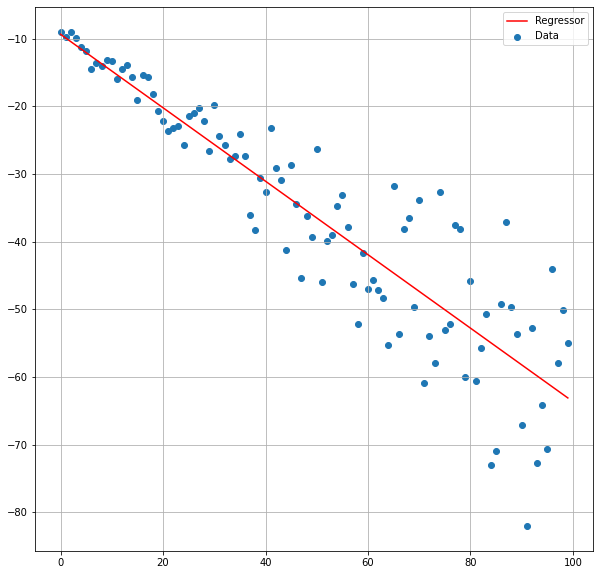

In [10]:
## TEST #7 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize()